{'downsize': 500,
 'extract_features': {'method': 'HARRIS',
                      'min_distance': 1,
                      'patch_size': 59,
                      'threshold_rel': 1e-07},
 'irr_weight': 0.5,
 'match': {'max_distance': 200},
 'model_robust_param_limits': [[[-10, -1, -100],
                                [-1, -2, -100],
                                [-0.1, -0.02, 0]],
                               [[10, 1, 100], [1, 2, 100], [0.1, 0.02, 2]]],
 'preprocess_images': {'blur_sigma': 2,
                       'edge': False,
                       'edge_high_threshold': 0.1,
                       'edge_low_threshold': 0.05,
                       'edge_sigma': 2,
                       'equalize': False,
                       'normalize': True},
 'ransac': {'max_trials': 10000, 'min_samples': 5, 'residual_threshold': 10}}
{'downsize': 400,
 'extract_features': {'method': 'HARRIS',
                      'min_distance': 1,
                      'patch_size': 50,
          

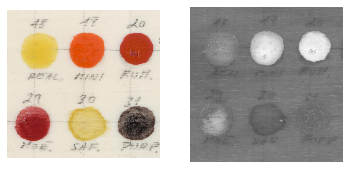

In [5]:
from falsevisir import *
from pprint import pprint

pprint(CFG)

CFG['preprocess_images']['blur_sigma'] = 1
CFG['preprocess_images']['normalize'] = 0

CFG['downsize'] = 400

CFG['extract_features']['patch_size'] = CFG['downsize'] // 8

pprint(CFG)

im_paths = "samples/vis_samples/a002_palette.jpg", "samples/ir_samples/a002_s002__TL.jpg"
vi_path, ir_path = [Path(fp) for fp in im_paths]

#%% Load images
vi_image, ir_image = [load_image(fp) for fp in (vi_path, ir_path)]

print(info(vi_image))
print(info(ir_image))
#show_images((vi_image, ir_image))

#%% Resize to same height
vi_image, ir_image = resize_images((vi_image, ir_image))

print(info(vi_image))
print(info(ir_image))
show_images((vi_image, ir_image))

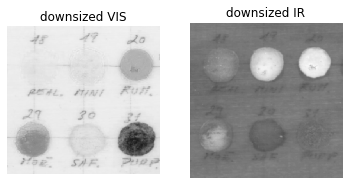

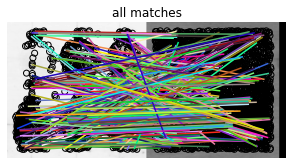

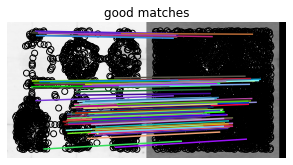

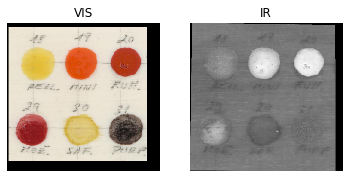

In [6]:
#%% Warp images
vi_image_w, ir_image_w = warp_images(vi_image, ir_image, show=True)



shape: (654, 667, 3) dtype: float64 min--max: 0.000--0.933
shape: (654, 667, 3) dtype: float64 min--max: 0.000--0.998


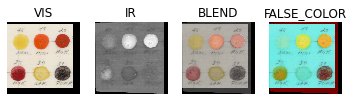

In [7]:
#%% Blend images
blend_im = blend_image(vi_image_w, ir_image_w, weight=.5)
print(info(blend_im))

#%% False color image
false_im = false_image(vi_image_w, ir_image_w)
print(info(false_im))

#%% Show results
show_images((vi_image_w, ir_image_w, blend_im, false_im), labels=("VIS", "IR", "BLEND", "FALSE_COLOR"))

In [4]:
#%% Save results

dst_dir = vi_path.parent / f"false_color_images"
dst_dir.mkdir(exist_ok=True)

# Warped images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp.png", vi_image_w)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_ir_warp.png", ir_image_w)

# Blended images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_blend.png", blend_im)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_falsecolor.png", false_im)



In [ ]:
for ch in range(3):
    save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp_{ch}.png", vi_image_w[:,:,ch])